### Basis Encoding

In [11]:
import math
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2
from qiskit.circuit.library import ZZFeatureMap

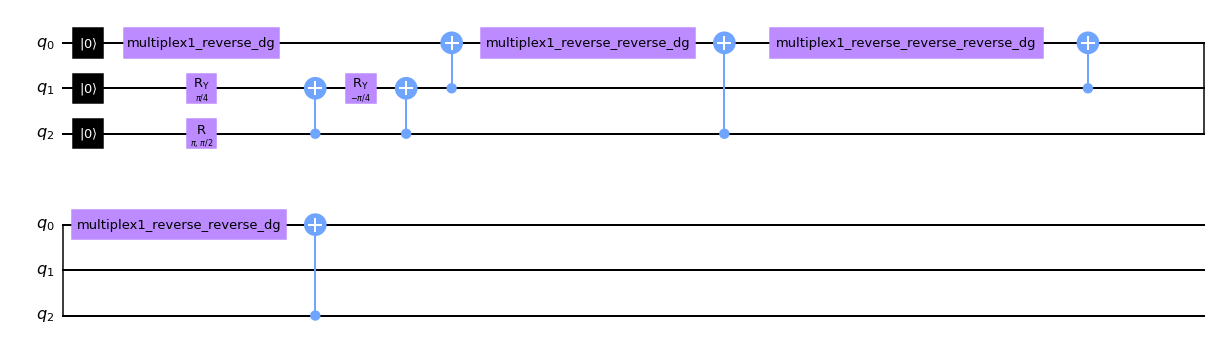

In [2]:
desired_state = [
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(2),
    0,
    1 / math.sqrt(2)]

qc = QuantumCircuit(3)
qc.initialize(desired_state, [0,1,2])
qc.decompose().decompose().decompose().decompose().decompose().draw(output='mpl')

### Amplitude Encoding
Only requires $log_{2}(NM)$ qubits to encode

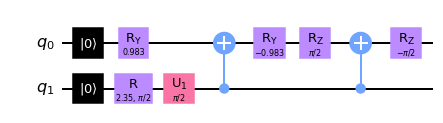

In [3]:
desired_state = [
    1 / math.sqrt(15.25) * 1.5,
    0,
    1 / math.sqrt(15.25) * -2,
    1 / math.sqrt(15.25) * 3]

qc = QuantumCircuit(2)
qc.initialize(desired_state, [0,1])

qc.decompose().decompose().decompose().decompose().decompose().draw(output='mpl')

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

### Angle encoding
Angle encoging encodes $N$ features into the rotation angles of $n$ qubits, where $N \leq n$ (https://learn.qiskit.org/course/machine-learning/data-encoding)

Encode $x=(0,\pi/4,\pi/2)$:

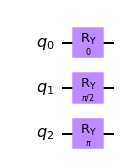

In [4]:
qc = QuantumCircuit(3)
qc.ry(0,0)
qc.ry(2*math.pi/4, 1)
qc.ry(2*math.pi/2, 2)
qc.draw(output='mpl')

###### Dense data encoding encodes two features per qubit

### Aribitrary encoding
Encodes $N$ features as rotarions on $N$ parameterized gates on $n$ qubits, where $n \leq N$. Like Angle encoding, it only encodes on data point at a time. It also uses a constant depth quantum circuit and $n \leq N$ qubits, meaning it can be run on current quantum hardware.

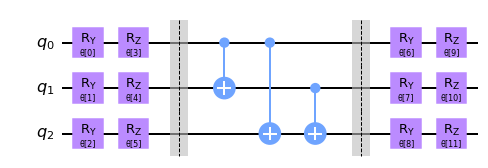

In [8]:
circuit = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)
circuit.decompose().draw(output='mpl')

Here we encode $x=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2)$ with 12 features, using each of the parameterized gates to encode a different feature:

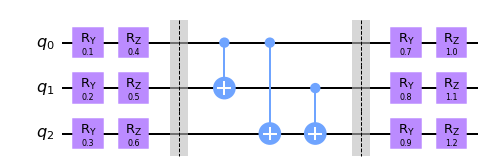

In [9]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
encode = circuit.bind_parameters(x)
encode.decompose().draw(output='mpl')

The Qiskit ZZFeatureMap circuit with 3 qubits, only encodes a data point of 3 features, despite having 6 parameterized gates:

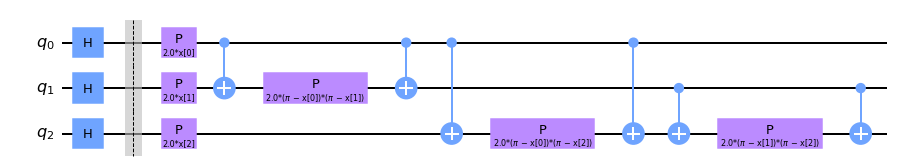

In [12]:
circuit = ZZFeatureMap(3, reps=1, insert_barriers=True)
circuit.decompose().draw(output='mpl')

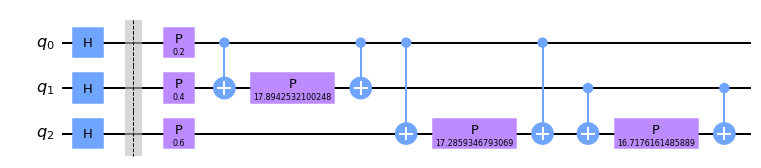

In [13]:
x = [0.1, 0.2, 0.3]
encode = circuit.bind_parameters(x)
encode.decompose().draw(output='mpl')

The performance of different parameterized quantum circuits on different types of data is an active area of investigation.